# Ranking League one Goalkeepers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

df=pd.read_csv('league1_gks.csv')
df.head()

,Name,Rating,Season,Appearances,Save%,Clean_Sheets,Conceded/90,Passes/90,Pass%,Sweeps/90,Claims/90,Goals_Prevented
0,Ryan Allsop,7.05,24/25,38,75.90,21,0.45,43.57,73.33,0.55,0.61,7.15
1,Arthur Okonkwo,7.13,24/25,33,77.23,19,0.64,23.44,49.20,0.24,1.24,5.00
2,Corey Addai,6.98,24/25,31,66.30,10,1.00,34.76,64.90,0.57,0.96,-0.99
3,William Mannion,6.87,24/25,31,65.82,15,0.82,23.20,52.50,0.58,1.31,-3.29
4,Franco Ravizzoli,6.90,24/25,28,70.93,9,0.86,38.26,55.86,0.70,0.56,2.25


- Quick view on Goalkeeper stats in the 24/25 season

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,26.0,6.772308,0.426683,4.90,6.7075,6.850,6.9175,7.29
Appearances,26.0,31.884615,8.001634,17.00,26.2500,32.000,38.0000,46.00
Save%,26.0,66.856154,5.871852,56.92,61.8725,66.310,70.4525,77.23
Clean_Sheets,26.0,9.730769,5.481297,3.00,5.2500,9.000,14.5000,21.00
Conceded/90,26.0,1.195769,0.397926,0.45,0.9550,1.125,1.3950,2.33
Passes/90,26.0,33.938462,4.968547,23.20,31.4850,33.810,37.2775,43.57
Pass%,26.0,55.126154,10.039791,36.80,49.2000,54.180,61.5800,73.33
Sweeps/90,26.0,0.552308,0.254249,0.20,0.3700,0.545,0.7000,1.13
Claims/90,26.0,0.934615,0.290960,0.56,0.6950,0.875,1.0800,1.74
Goals_Prevented,26.0,-0.919615,5.946176,-13.82,-4.1850,-2.260,3.7350,9.72


In [3]:

# Filter for 24/25 season
df_filtered = df[df['Season'] == '24/25'].copy()

# Create scaling factor for normalisation (normalize to 46 appearances)
df_filtered['Scaling_Factor'] = 46 / df_filtered['Appearances']

# Normalize Clean_Sheets and Goals_Prevented
df_filtered['Clean_Sheets_norm'] = df_filtered['Clean_Sheets'] * df_filtered['Scaling_Factor']
df_filtered['Goals_Prevented_norm'] = df_filtered['Goals_Prevented'] * df_filtered['Scaling_Factor']

# Create rankings for each stat
df_filtered['Rank_Rating'] = df_filtered['Rating'].rank(ascending=False)
df_filtered['Rank_Save%'] = df_filtered['Save%'].rank(ascending=False)
df_filtered['Rank_Clean_Sheets_norm'] = df_filtered['Clean_Sheets_norm'].rank(ascending=False)
df_filtered['Rank_Conceded/90'] = df_filtered['Conceded/90'].rank(ascending=True)
df_filtered['Rank_Goals_Prevented_norm'] = df_filtered['Goals_Prevented_norm'].rank(ascending=False)
df_filtered['Rank_Claims/90'] = df_filtered['Claims/90'].rank(ascending=False)
df_filtered['Rank_Pass%'] = df_filtered['Pass%'].rank(ascending=False)
df_filtered['Rank_Sweeps/90'] = df_filtered['Sweeps/90'].rank(ascending=False)
df_filtered['Rank_Passes/90'] = df_filtered['Passes/90'].rank(ascending=False)

# Apply weighted scoring
df_filtered['Weighted_Score'] = (
    df_filtered['Rank_Rating'] * 9 +
    df_filtered['Rank_Save%'] * 8 +
    df_filtered['Rank_Clean_Sheets_norm'] * 7 +
    df_filtered['Rank_Conceded/90'] * 6 +
    df_filtered['Rank_Goals_Prevented_norm'] * 5 +
    df_filtered['Rank_Claims/90'] * 4 +
    df_filtered['Rank_Pass%'] * 3 +
    df_filtered['Rank_Sweeps/90'] * 2 +
    df_filtered['Rank_Passes/90'] * 1
)

df_filtered['Overall_Rank'] = df_filtered['Weighted_Score'].rank(ascending=True)

# Sort by overall rank
df_final = df_filtered.sort_values('Overall_Rank')

# Output rankings
print(df_final[['Name', 
                'Rating', 
                'Save%', 
                'Clean_Sheets_norm', 
                'Conceded/90',
                'Passes/90',
                'Pass%',
                'Sweeps/90',
                'Claims/90',
                'Goals_Prevented_norm',
                'Weighted_Score', 
                'Overall_Rank']])


                Name  Rating  Save%  Clean_Sheets_norm  Conceded/90  \
0        Ryan Allsop    7.05  75.90          25.421053         0.45   
1     Arthur Okonkwo    7.13  77.23          26.484848         0.64   
6       Joel Pereira    7.29  74.44          14.950000         1.05   
17     Joe Whitworth    7.15  66.32          15.000000         1.35   
5        Josh Keeley    6.70  75.40          18.871795         0.94   
2        Corey Addai    6.98  66.30          14.838710         1.00   
4   Franco Ravizzoli    6.90  70.93          14.785714         0.86   
3    William Mannion    6.87  65.82          22.258065         0.82   
16        Sam Tickle    6.60  75.90          18.000000         0.91   
21      Max Crocombe    6.92  69.15          12.837209         1.21   
14   Dillon Phillips    6.92  69.70           8.363636         1.09   
10     Jacob Chapman    6.91  62.69          18.000000         1.04   
23  Joshua Griffiths    6.80  70.67          11.500000         1.67   
12    

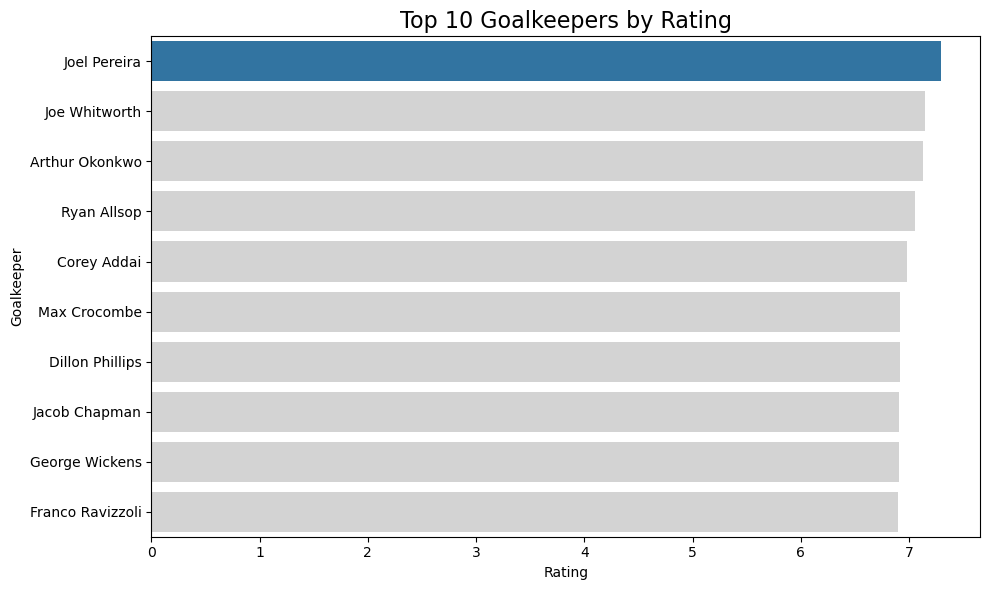

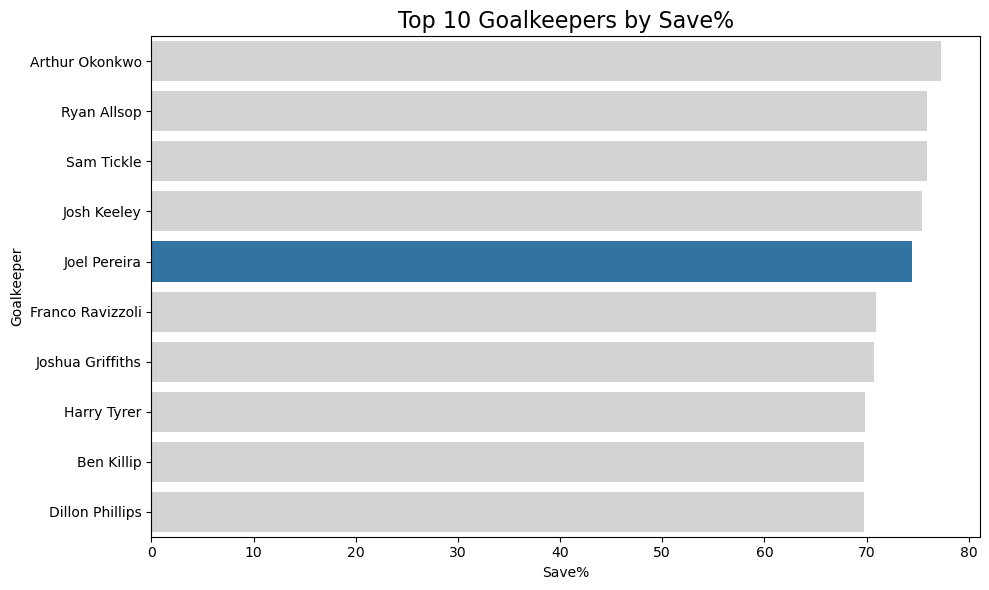

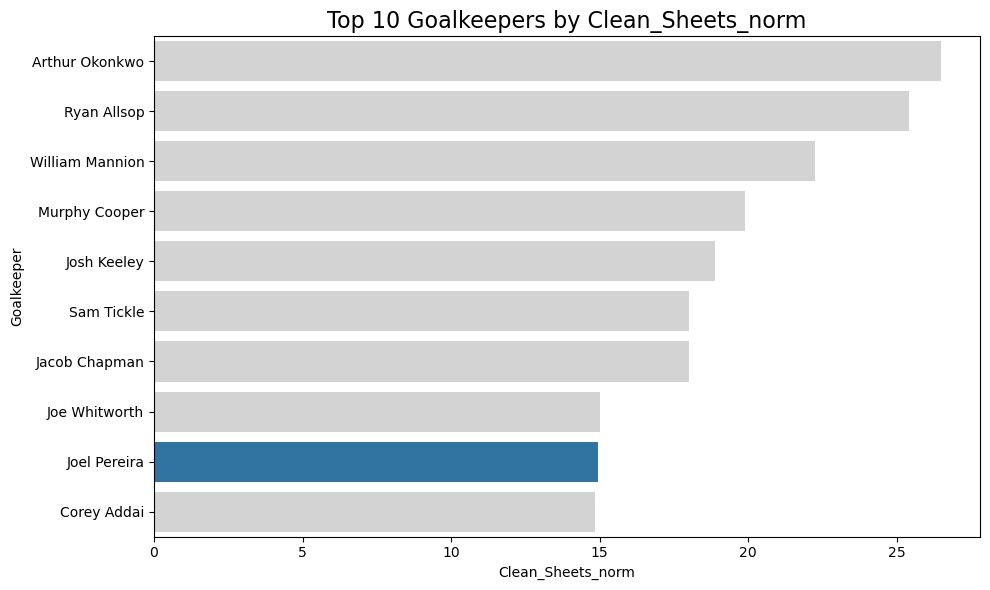

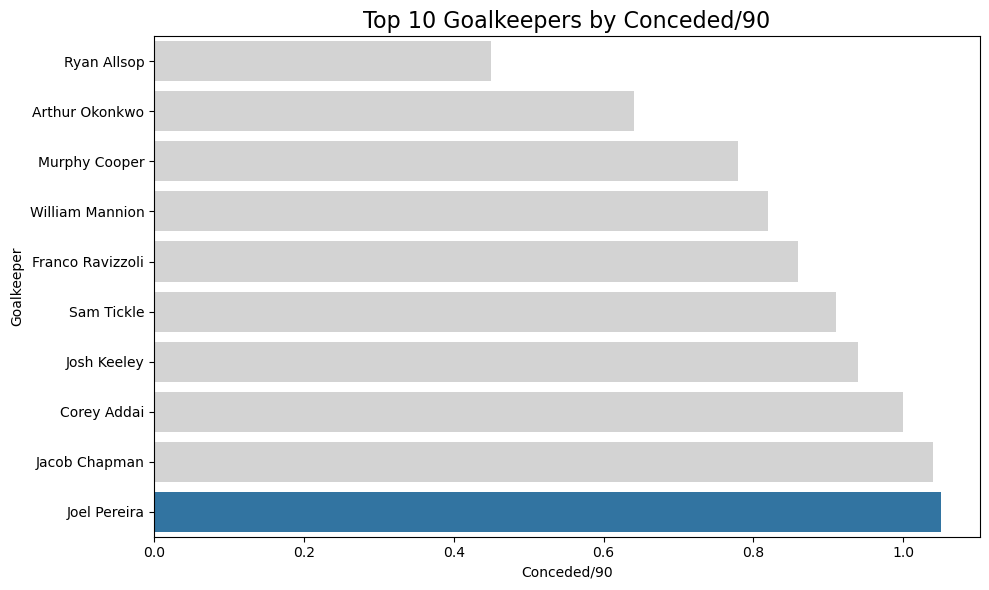

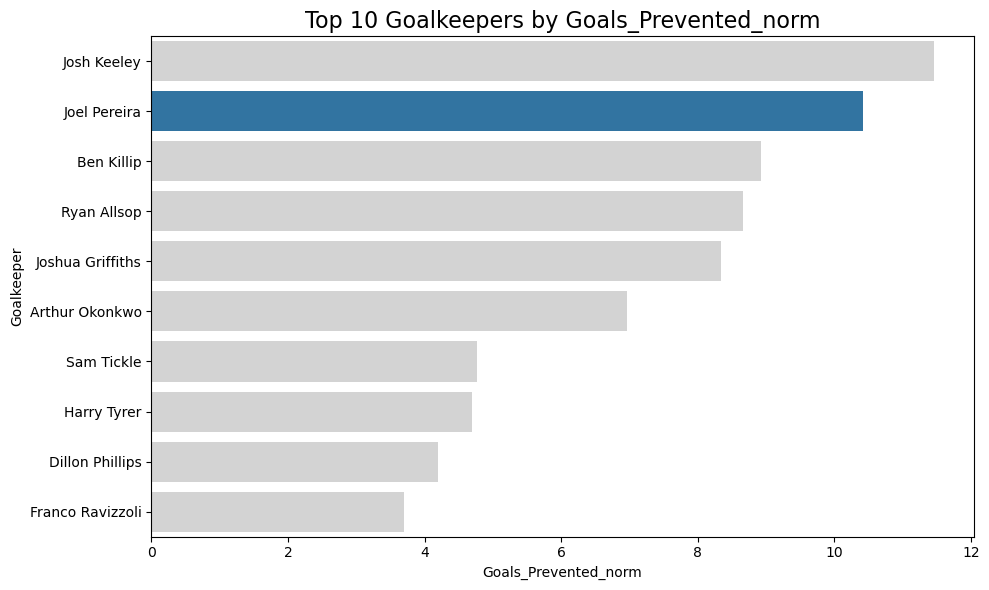

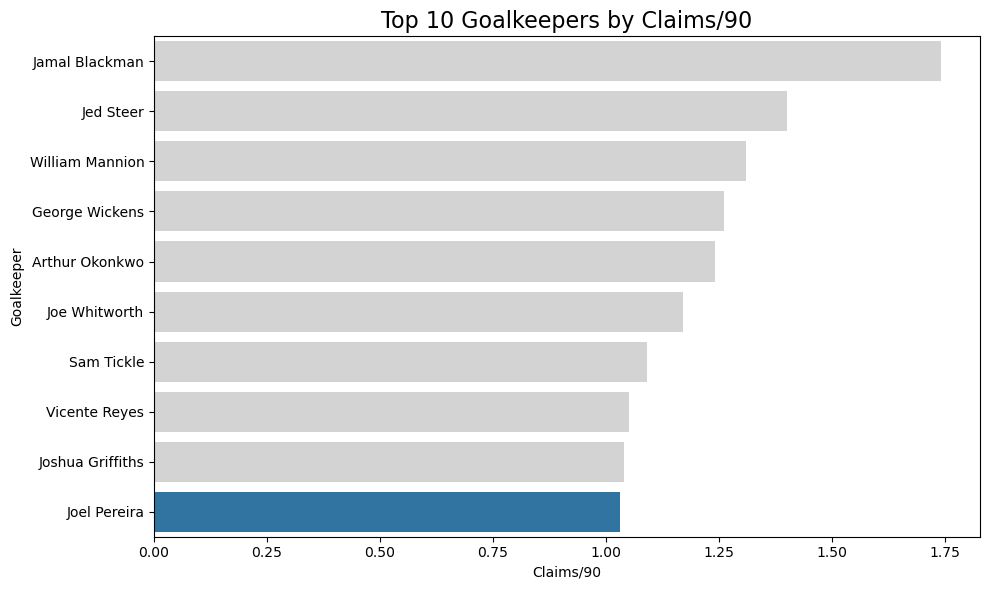

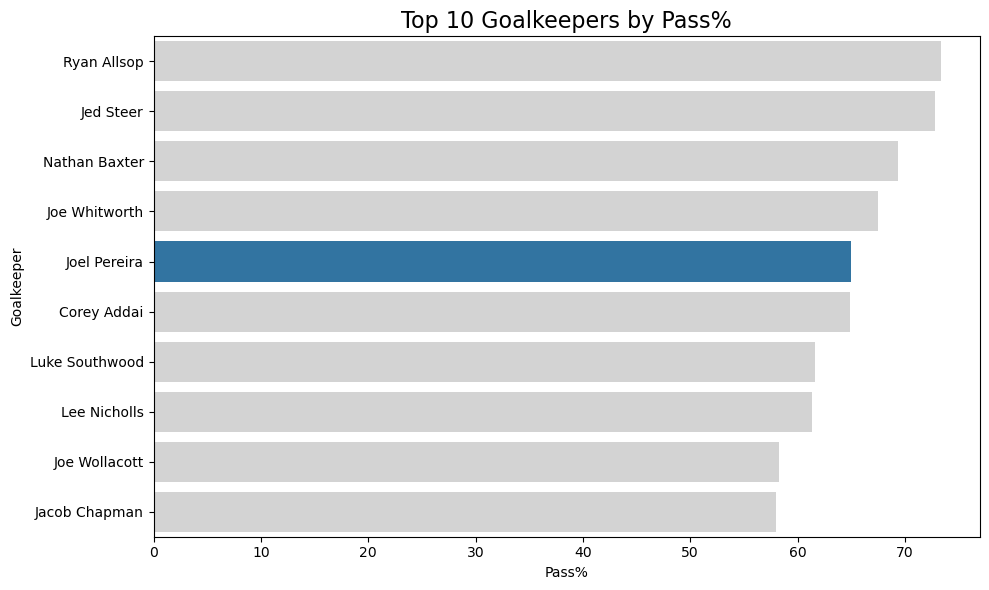

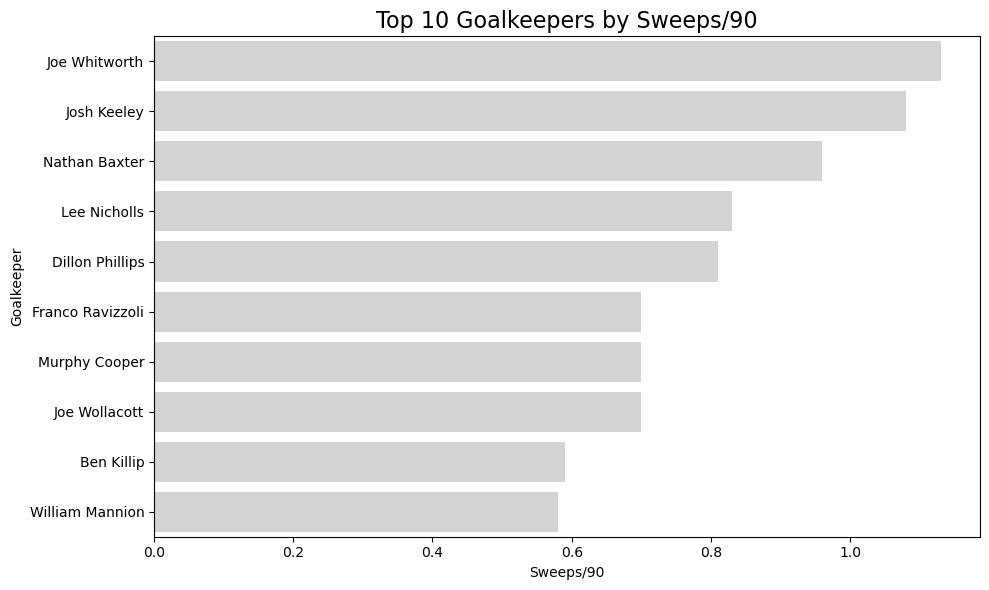

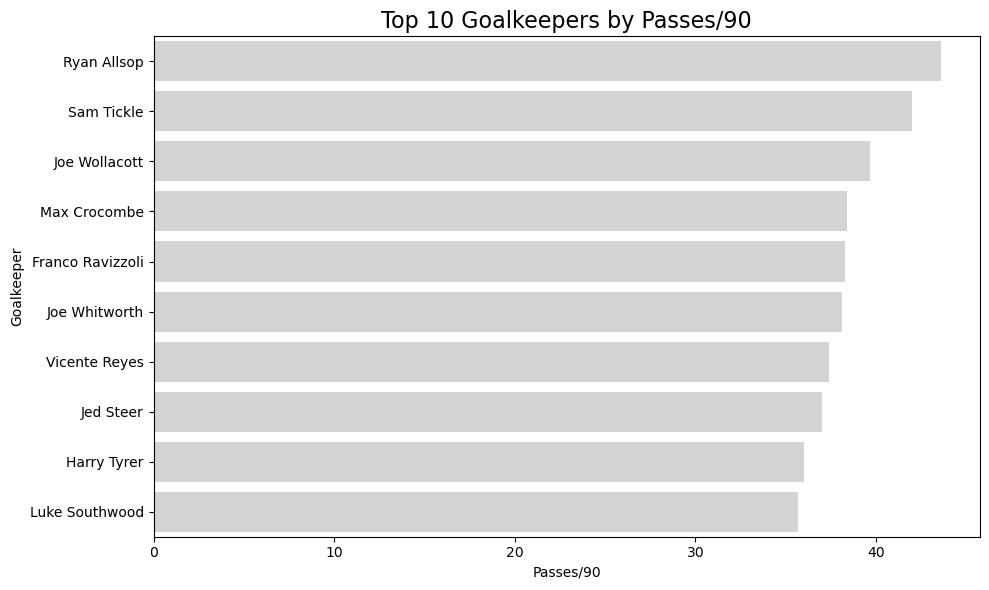

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For nice plots in Jupyter
%matplotlib inline

# Define which columns you want to plot
stats = [
    'Rating', 'Save%', 'Clean_Sheets_norm', 
    'Conceded/90', 'Goals_Prevented_norm', 
    'Claims/90', 'Pass%', 'Sweeps/90', 'Passes/90'
]

# Loop through each stat and generate top 10 bar chart
for stat in stats:
    if stat == 'Conceded/90':
        top10 = df_final.sort_values(by=stat, ascending=True).head(10)
    else:
        top10 = df_final.sort_values(by=stat, ascending=False).head(10)

    colors = ['#1f77b4' if name == 'Joel Pereira' else '#d3d3d3' for name in top10['Name']]

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top10, x=stat, y='Name', palette=colors)
    plt.title(f'Top 10 Goalkeepers by {stat}', fontsize=16)
    plt.xlabel(stat)
    plt.ylabel('Goalkeeper')
    plt.tight_layout()
    plt.show()



In [5]:
# List of stats to include in correlation
stats = [
    'Rating', 'Save%', 'Clean_Sheets_norm', 'Conceded/90',
    'Goals_Prevented_norm', 'Claims/90', 'Pass%', 'Sweeps/90', 'Passes/90'
]

# Filter your dataframe to just the season 24/25 (if not done yet)
df_season = df_final[df_final['Season'] == '24/25']

# Extract relevant data
corr_data = df_season[stats]


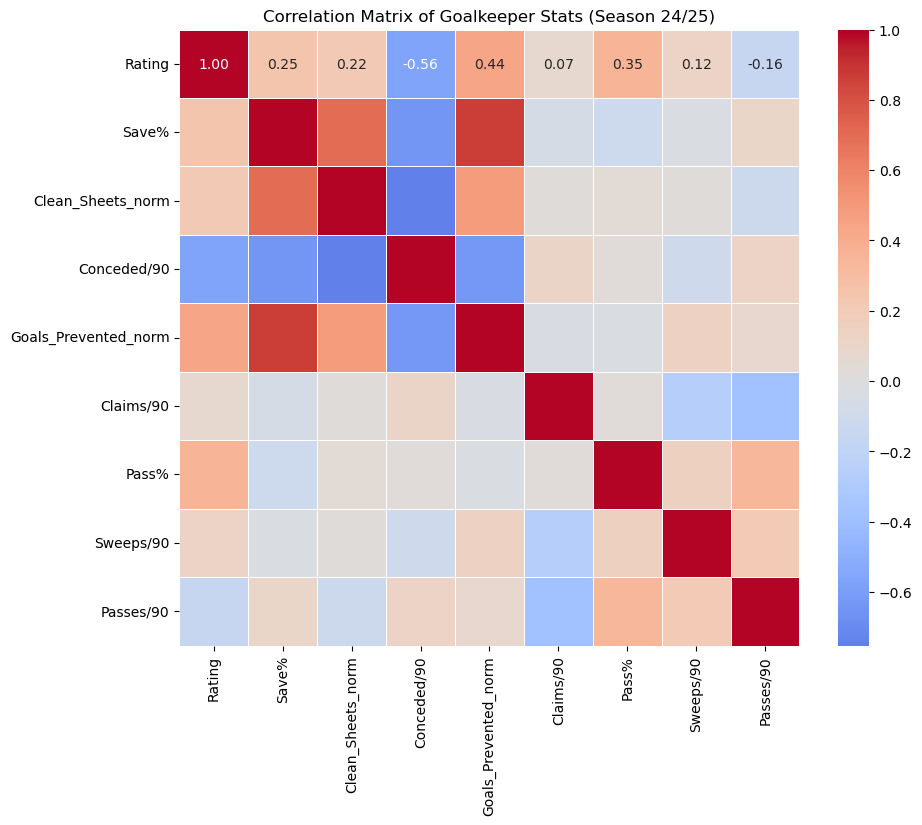

In [6]:
corr_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,       # Show correlation values on heatmap
    cmap='coolwarm',  # Color theme: blue=negative, red=positive
    center=0,         # Center the colormap at zero
    linewidths=0.5,
    fmt=".2f"
)
plt.title('Correlation Matrix of Goalkeeper Stats (Season 24/25)')
plt.show()
